# Prototyping trading strategies in python

# Benefits of python
clean and readable syntax
<br> fast learning curve
<br> object oriented
<br> library of modules
<br> most used languages in IoT, Data Science
<br> strong open source

In [1]:
print("hello world")

hello world


In [2]:
"hello world"

'hello world'

# Python for algorithmic trading
syntax is attractive for science and particularly finance
<br>fast learning curve
<br>solid Machine Learning libraries
<br>Quick prototyping, fast enough execution
<br>Many Algorithmic Trading Libraries and Tools
<br>PANDAS

# Python ToolBox
<br> Pandas
<br> NumPy
<br> Matplotlib
<br> Jupyter Notebook

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt

In [4]:
spy = yf.download("SPY",start="2000-01-01")
spy.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,148.25000,148.25000,143.875000,145.4375,94.595100,8164300
2000-01-04,143.53125,144.06250,139.640625,139.7500,90.895798,8089800
2000-01-05,139.93750,141.53125,137.250000,140.0000,91.058418,12177900
2000-01-06,139.62500,141.50000,137.750000,137.7500,89.594963,6227200
2000-01-07,140.31250,145.75000,140.062500,145.7500,94.798317,8066500


In [5]:
spy = yf.download("SPY",start="2000-01-01")

#Normalising the date
ratio = spy['Close']/spy['Adj Close']
spy['close'] = spy['Adj Close']
spy['open'] = spy['Open']/ratio
spy['high'] = spy['High']/ratio
spy['low'] = spy['Low']/ratio
spy['volume'] = spy['Volume']/ratio
spy = spy[['open','high','low','close','volume']]
spy.head()
#spy

[*********************100%%**********************]  1 of 1 completed


,open,high,low,close,volume
Date,,,,,
2000-01-03,96.424400,96.424400,93.578823,94.595100,5.310204e+06
2000-01-04,93.355188,93.700722,90.824658,90.895798,5.261745e+06
2000-01-05,91.017767,92.054370,89.269771,91.058418,7.920717e+06
2000-01-06,90.814495,92.034027,89.594963,89.594963,4.050278e+06
2000-01-07,91.261673,94.798317,91.099069,94.798317,5.246591e+06


In [6]:
spy.shape

(5950, 5)

In [7]:
spy['return'] = spy['close'].pct_change()
spy['return'].describe()

/tmp/ipykernel_3727/2163846493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy['return'] = spy['close'].pct_change()


count    5949.000000
mean        0.000336
std         0.012418
min        -0.109424
25%        -0.004805
50%         0.000649
75%         0.006018
max         0.145198
Name: return, dtype: float64

In [8]:
spy[5:10][["close","return"]]

,close,return
Date,,
2000-01-10,95.123535,0.003431
2000-01-11,93.985306,-0.011966
2000-01-12,93.050331,-0.009948
2000-01-13,94.310501,0.013543
2000-01-14,95.591026,0.013578


In [9]:
spy[spy['return'] > 0.005 ]['return'].describe()

count    1717.000000
mean        0.012826
std         0.009772
min         0.005002
25%         0.007052
50%         0.010139
75%         0.014774
max         0.145198
Name: return, dtype: float64

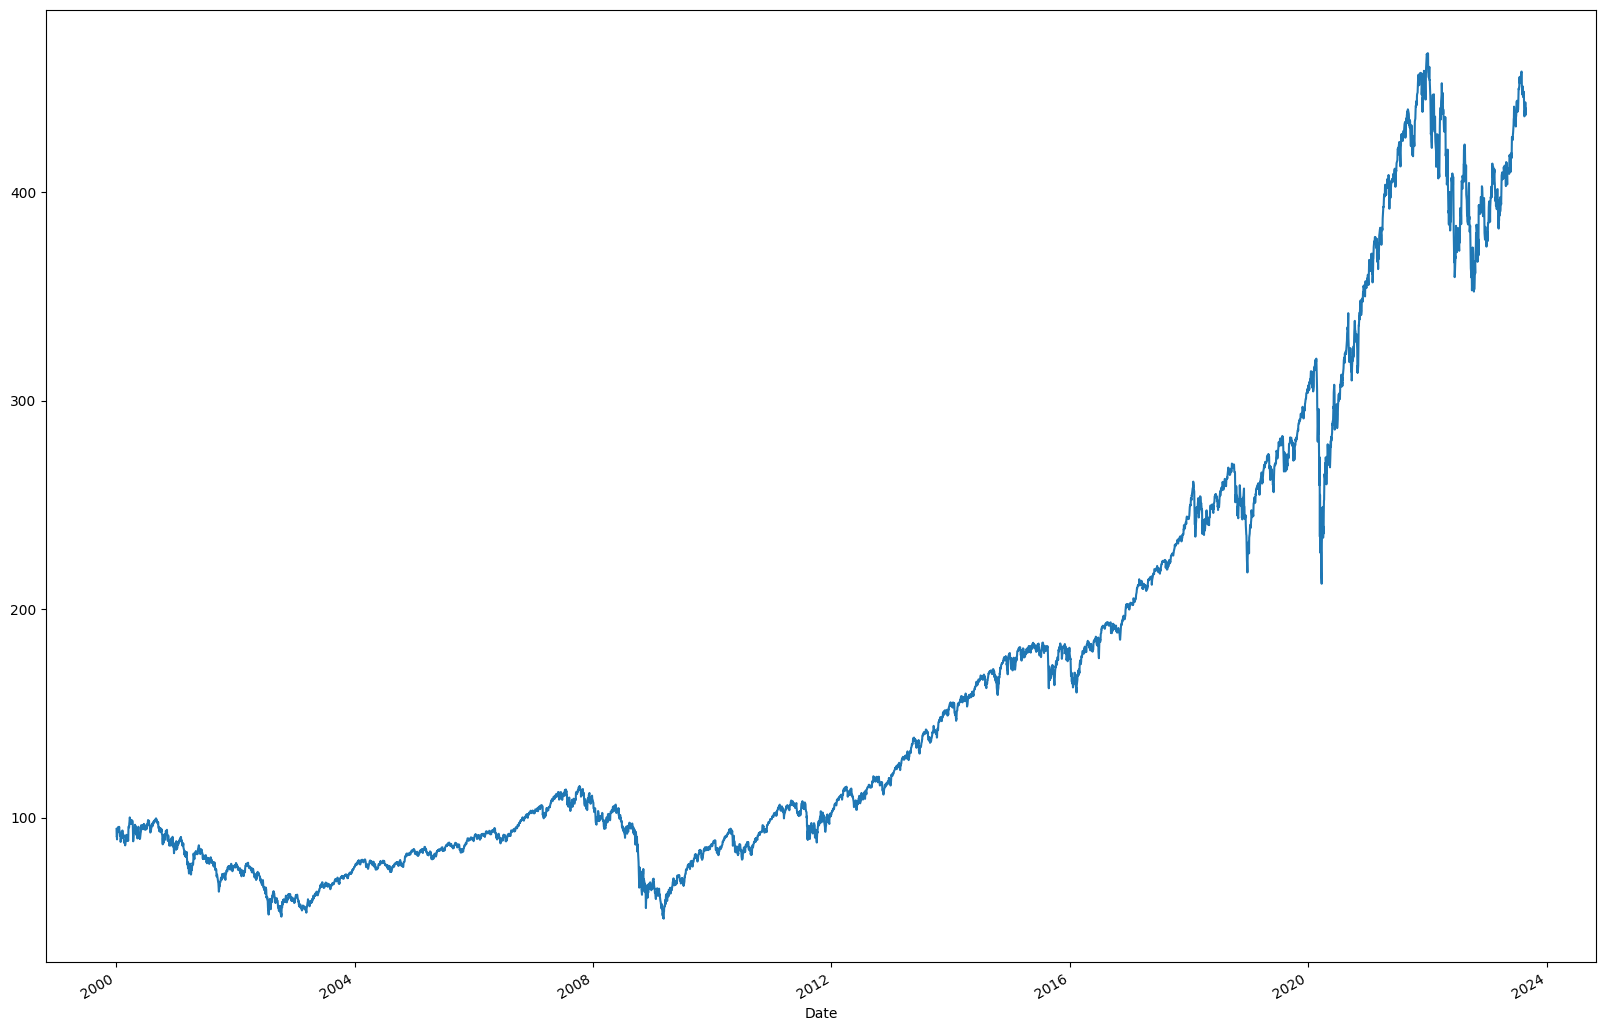

In [10]:
plt.figure(figsize=(20,14))
spy['close'].plot()
plt.show()

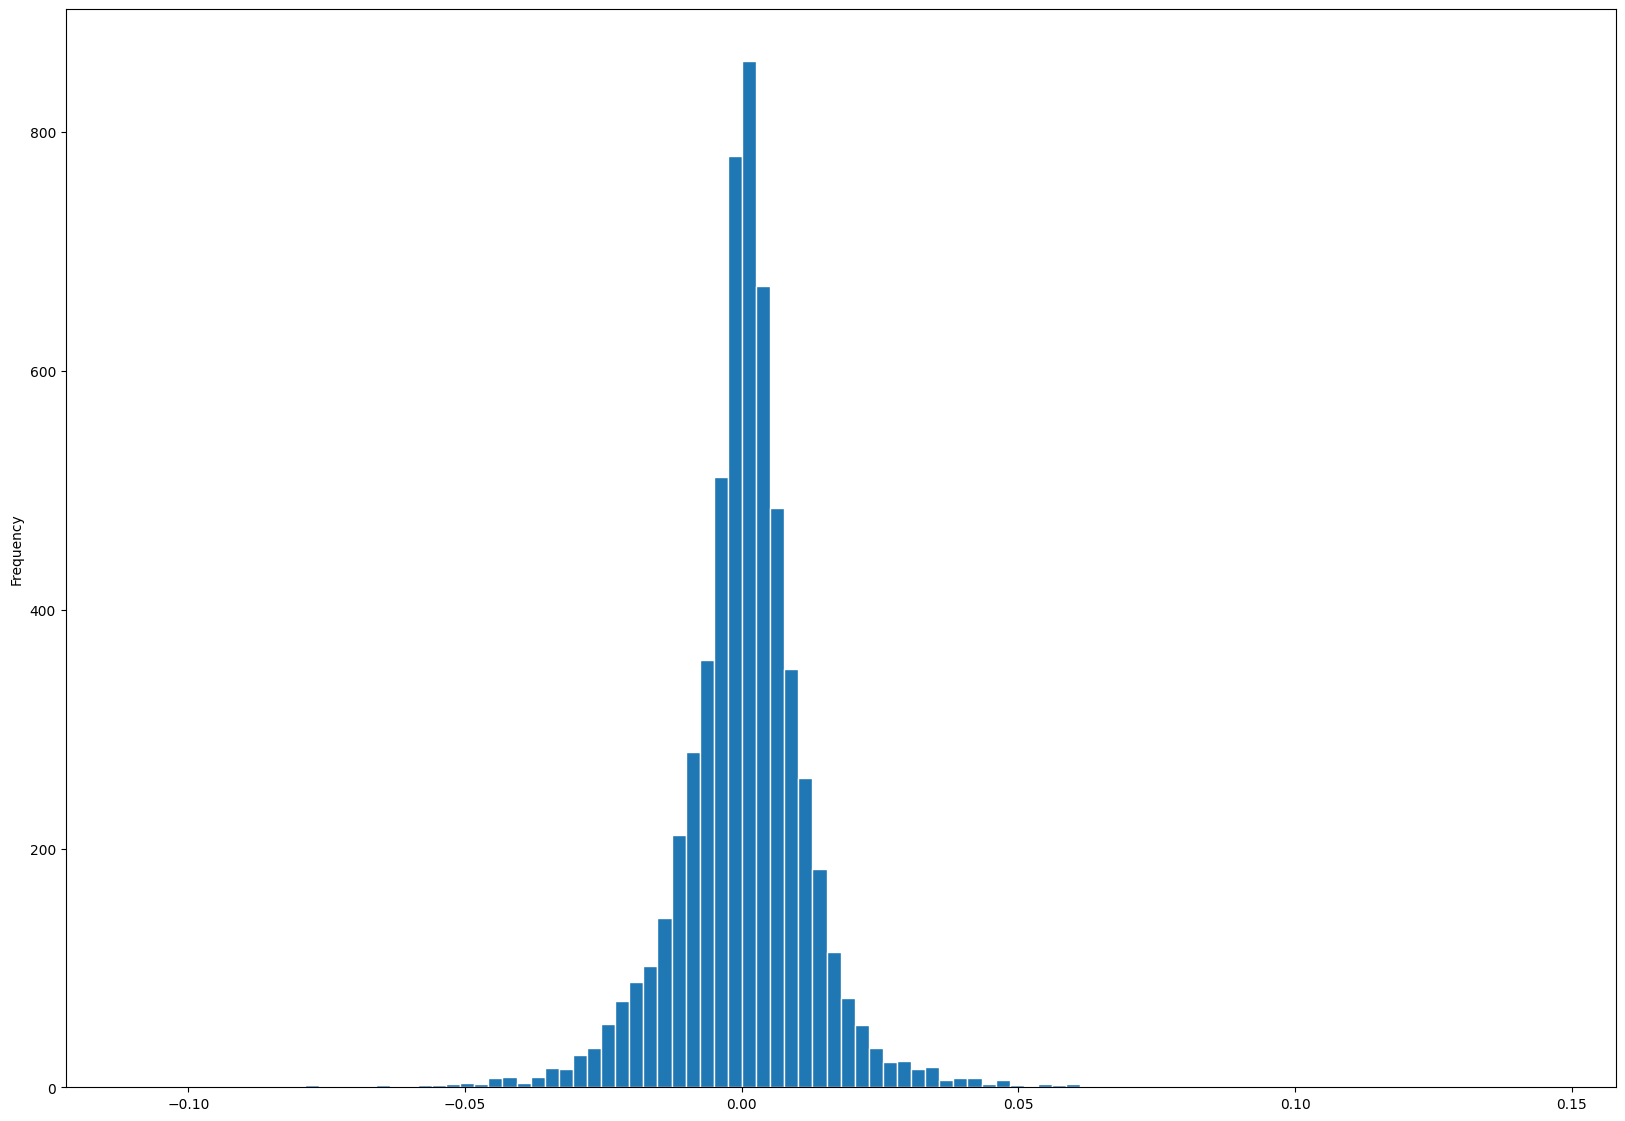

In [11]:
# distribution of returns
plt.figure(figsize=(20,14))
spy['return'].plot.hist(bins=100,edgecolor='white')
plt.show()

In [12]:
#Sampling
spy['return'].resample("1A").sum()*100

Date
2000-12-31    -6.429938
2001-12-31   -10.111433
2002-12-31   -20.833311
2003-12-31    26.198988
2004-12-31    10.784571
2005-12-31     5.246368
2006-12-31    15.209576
2007-12-31     6.277666
2008-12-31   -37.358457
2009-12-31    26.929415
2010-12-31    15.631123
2011-12-31     4.527725
2012-12-31    15.638935
2013-12-31    28.622712
2014-12-31    13.265240
2015-12-31     2.414639
2016-12-31    12.184702
2017-12-31    19.876678
2018-12-31    -3.231731
2019-12-31    27.969374
2020-12-31    22.469191
2021-12-31    26.107297
2022-12-31   -17.134252
2023-12-31    15.369088
Freq: A-DEC, Name: return, dtype: float64

# Technical indicators with Python


In [13]:
spy['ma1'] = spy['close'].rolling(window=50).mean() # Rolling average for 50 days
spy['ma2'] = spy['close'].rolling(window=200).mean() # Rolling average for 200 days
spy['ma1'].tail()

/tmp/ipykernel_3727/3729587649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy['ma1'] = spy['close'].rolling(window=50).mean() # Rolling average for 50 days
/tmp/ipykernel_3727/3729587649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy['ma2'] = spy['close'].rolling(window=200).mean() # Rolling average for 200 days


Date
2023-08-21    444.192232
2023-08-22    444.389052
2023-08-23    444.605761
2023-08-24    444.642682
2023-08-25    444.730841
Name: ma1, dtype: float64

In [14]:
spy['ma2'].tail()

Date
2023-08-21    410.152881
2023-08-22    410.491821
2023-08-23    410.874229
2023-08-24    411.199559
2023-08-25    411.522504
Name: ma2, dtype: float64

<Axes: xlabel='Date'>

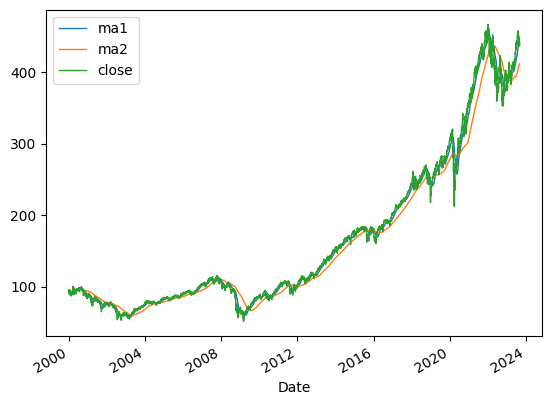

In [15]:
spy[['ma1','ma2','close']].plot(linewidth=1)

<Axes: xlabel='Date'>

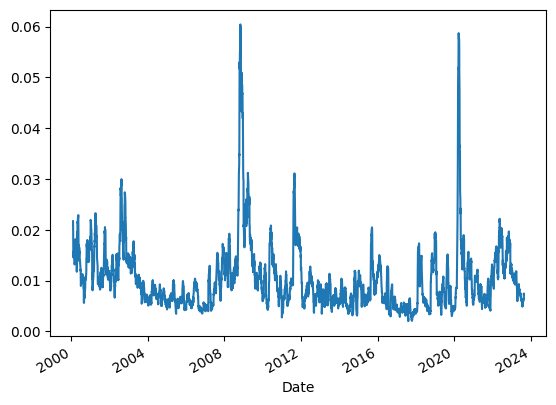

In [16]:
spy['return'].rolling(window=20).std().plot()

/tmp/ipykernel_3727/2096556060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy['logret'] =  np.log(spy['close']/spy['close'].shift(1)) # calculate returns
/tmp/ipykernel_3727/2096556060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy['volatility'] = spy['logret'].rolling(window=252).std()*np.sqrt(252)


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

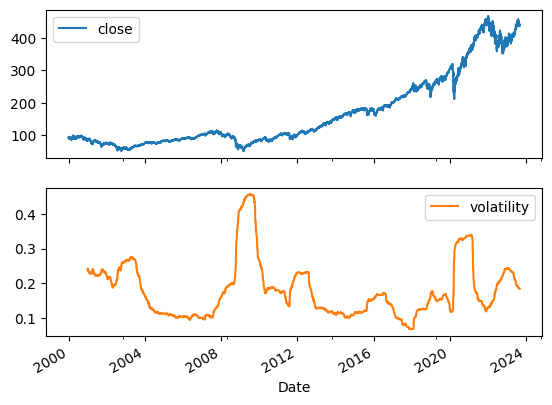

In [17]:
spy['logret'] =  np.log(spy['close']/spy['close'].shift(1)) # calculate returns
spy['volatility'] = spy['logret'].rolling(window=252).std()*np.sqrt(252)

spy[['close','volatility']].plot(subplots=True)

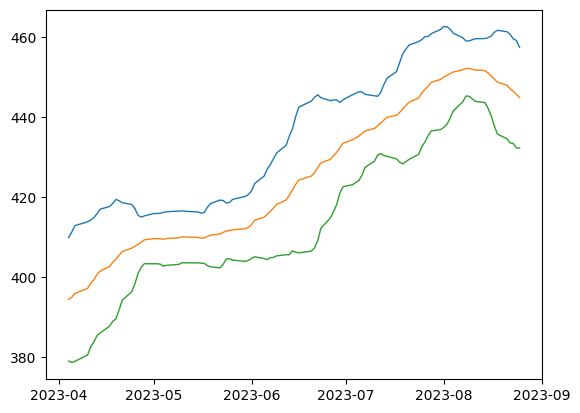

In [18]:
spy['sma'] = spy['close'].rolling(window=20).mean()
spy['std'] = spy['close'].rolling(window=20).std()

spy['upperbb'] = spy['sma'] + (spy['std'] * 2)
spy['lowerbb'] = spy['sma'] - (spy['std'] * 2)

#plot_candlestick(spy[-100:])
plt.plot(spy[-100:][['upperbb','sma','lowerbb']],linewidth=1)

In [19]:
# To do candle stick and TA-lib

In [20]:
#Vectorised Back testing
#Event Based Backtesting

# Vectorised Prototyping

<Axes: xlabel='Date'>

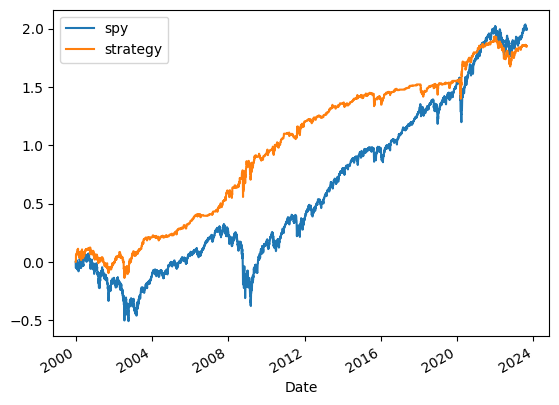

In [21]:
portfolio = pd.DataFrame(data={'spy':spy['return']})
portfolio['strategy'] = portfolio[portfolio['spy'].shift(1) <= -0.005]['spy']
portfolio.fillna(0).cumsum().plot()

# Sharpe Ratio
Measure of risk adjusted return of investment( > 1 is good, > 2 is great)
<br> Formula:
<br>sharpe(X) = (rX - Rf) / stdDev(X)
<br> X - Investment
<br> rX is the average rate of the return of X
<br> Rf is the best available risk-free security
<br> stdDev(X) - Standard Deviation of rX


In [22]:
# Annualized Sharpe Ratio

def sharpe(returns, periods=252,riskfree=0):
    returns = returns.dropna()
    return np.sqrt(periods) * (np.mean(returns-riskfree))/np.std(returns)

In [23]:
#benchmark sharpe
sharpe(portfolio['spy'])

0.4290068108103764

In [24]:
#strategy sharpe
sharpe(portfolio['strategy'])

1.2209111256802514

In [25]:
#time in market
len(portfolio['strategy'].dropna())/len(portfolio)

0.2445378151260504

# EOY returns

In [26]:
eoy = portfolio.resample("A").sum()
eoy['diff'] = eoy['strategy']/eoy['spy']
print(np.round(eoy[['spy','strategy','diff']]*100,2))

              spy  strategy    diff
Date                               
2000-12-31  -6.43      3.69  -57.44
2001-12-31 -10.11     -5.20   51.39
2002-12-31 -20.83      9.04  -43.40
2003-12-31  26.20     13.54   51.69
2004-12-31  10.78      2.37   21.99
2005-12-31   5.25      9.82  187.19
2006-12-31  15.21      7.22   47.48
2007-12-31   6.28     19.61  312.41
2008-12-31 -37.36     23.44  -62.75
2009-12-31  26.93      8.87   32.95
2010-12-31  15.63     17.44  111.55
2011-12-31   4.53     10.44  230.57
2012-12-31  15.64      5.60   35.82
2013-12-31  28.62      9.61   33.58
2014-12-31  13.27      6.53   49.20
2015-12-31   2.41     -2.61 -108.17
2016-12-31  12.18      8.18   67.12
2017-12-31  19.88      4.47   22.47
2018-12-31  -3.23     -3.73  115.36
2019-12-31  27.97      6.98   24.95
2020-12-31  22.47     23.96  106.63
2021-12-31  26.11     13.58   52.02
2022-12-31 -17.13    -15.62   91.16
2023-12-31  15.37      7.81   50.79


Another Example of moving aveage
<br>GO Long where 50-day SMA > 200-day SMA
<br>GO Short where 50-day SMA < 200-day SMA

In [27]:
ma_portfolio = spy [['close','return']].copy()
ma_portfolio.rename(columns={'return':'spy'},inplace=True)
ma_portfolio.head()

,close,spy
Date,,
2000-01-03,94.595100,NaN
2000-01-04,90.895798,-0.039107
2000-01-05,91.058418,0.001789
2000-01-06,89.594963,-0.016072
2000-01-07,94.798317,0.058076


In [28]:
ma_portfolio['ma1'] = ma_portfolio['close'].rolling(window=50).mean()
ma_portfolio['ma2'] = ma_portfolio['close'].rolling(window=200).mean()
ma_portfolio

,close,spy,ma1,ma2
Date,,,,
2000-01-03,94.595100,NaN,NaN,NaN
2000-01-04,90.895798,-0.039107,NaN,NaN
2000-01-05,91.058418,0.001789,NaN,NaN
2000-01-06,89.594963,-0.016072,NaN,NaN
2000-01-07,94.798317,0.058076,NaN,NaN
...,...,...,...,...
2023-08-21,439.339996,0.006506,444.192232,410.152881
2023-08-22,438.149994,-0.002709,444.389052,410.491821
2023-08-23,443.029999,0.011138,444.605761,410.874229


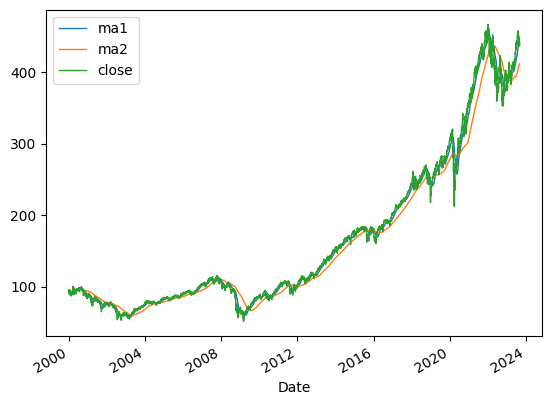

In [29]:
ma_portfolio[['ma1','ma2','close']].plot(linewidth=1)
plt.show()

In [30]:
#Run query here
ma_portfolio['position'] = np.where(
            ma_portfolio['ma1'].shift(1) > ma_portfolio['ma2'].shift(1),1,-1)
ma_portfolio['strategy'] = ma_portfolio['position'] * ma_portfolio['spy']
ma_portfolio

,close,spy,ma1,ma2,position,strategy
Date,,,,,,
2000-01-03,94.595100,NaN,NaN,NaN,-1,NaN
2000-01-04,90.895798,-0.039107,NaN,NaN,-1,0.039107
2000-01-05,91.058418,0.001789,NaN,NaN,-1,-0.001789
2000-01-06,89.594963,-0.016072,NaN,NaN,-1,0.016072
2000-01-07,94.798317,0.058076,NaN,NaN,-1,-0.058076
...,...,...,...,...,...,...
2023-08-21,439.339996,0.006506,444.192232,410.152881,1,0.006506
2023-08-22,438.149994,-0.002709,444.389052,410.491821,1,-0.002709
2023-08-23,443.029999,0.011138,444.605761,410.874229,1,0.011138


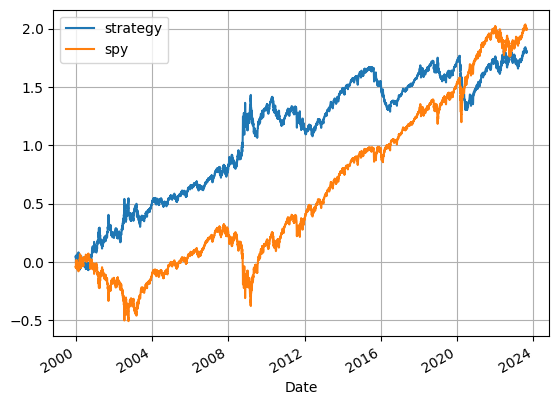

In [31]:
ma_portfolio[['strategy','spy']].cumsum().plot()
#plt.figure(figsize=(40,28))
plt.grid()
plt.show()

In [33]:
eoy = ma_portfolio.resample("A").sum()
eoy['diff'] = eoy['strategy']/eoy['spy']
print(np.round(eoy[['spy','strategy','diff']]*100,2))

              spy  strategy    diff
Date                               
2000-12-31  -6.43     13.20 -205.34
2001-12-31 -10.11     10.11 -100.00
2002-12-31 -20.83     17.73  -85.10
2003-12-31  26.20      9.20   35.13
2004-12-31  10.78      6.56   60.84
2005-12-31   5.25      5.25  100.00
2006-12-31  15.21      9.06   59.57
2007-12-31   6.28      7.76  123.58
2008-12-31 -37.36     37.36 -100.00
2009-12-31  26.93     15.67   58.19
2010-12-31  15.63     -7.32  -46.82
2011-12-31   4.53    -10.19 -225.06
2012-12-31  15.64      6.07   38.84
2013-12-31  28.62     28.62  100.00
2014-12-31  13.27     13.27  100.00
2015-12-31   2.41     -9.04 -374.21
2016-12-31  12.18    -11.91  -97.75
2017-12-31  19.88     19.88  100.00
2018-12-31  -3.23      7.17 -221.90
2019-12-31  27.97      3.12   11.14
2020-12-31  22.47    -22.30  -99.25
2021-12-31  26.11     26.11  100.00
2022-12-31 -17.13      0.84   -4.88
2023-12-31  15.37      3.84   24.96


# Backtesting strategies with Python

Common Backtesting Pitfalls :
<br>Data Snooping
<br>Backtesting on in sample data
<br>overfitting
<br>Overtrading
<br>Survivor Biased Data
<br>Not considering market impact/slippage
<br>Buy more shares than actually available

